In [275]:
import pandas as pd
import csv
import numpy as np
file_name="D:\StudyLife\Github\LLM-Social-Simulation\CSV\download3-run.csv" #TODO: enter file path here 
data=[]
pd.set_option('display.max_columns', 500)
start_index=1 #The index at which actual data starts.
df=pd.read_csv(file_name)
day = df.shape[0]
print(day)
df

50


,day,rob_count_0,rob_rebelled_0,trade_count_0,trade_accepted_0,0_obey_to,farm_count_0,rob_count_1,rob_rebelled_1,trade_count_1,trade_accepted_1,1_obey_to,farm_count_1,rob_count_2,rob_rebelled_2,trade_count_2,trade_accepted_2,2_obey_to,farm_count_2,rob_count_3,rob_rebelled_3,trade_count_3,trade_accepted_3,3_obey_to,farm_count_3,rob_count_4,rob_rebelled_4,trade_count_4,trade_accepted_4,4_obey_to,farm_count_4,rob_count_5,rob_rebelled_5,trade_count_5,trade_accepted_5,5_obey_to,farm_count_5,rob_count_6,rob_rebelled_6,trade_count_6,trade_accepted_6,6_obey_to,farm_count_6,rob_count_7,rob_rebelled_7,trade_count_7,trade_accepted_7,7_obey_to,farm_count_7,rob_count_8,rob_rebelled_8,trade_count_8,trade_accepted_8,8_obey_to,farm_count_8
0,2,1,1,0,0,-1,0,0,0,0,0,-1,1,1,1,0,0,3,0,1,0,0,0,-1,0,1,1,0,0,-1,0,1,1,0,0,-1,0,1,1,0,0,-1,0,0,0,0,0,-1,1,0,0,0,0,-1,1
1,3,2,2,0,0,-1,0,1,1,0,0,-1,1,1,1,0,0,3,1,2,0,0,0,-1,0,2,2,0,0,-1,0,2,2,0,0,-1,0,1,1,0,0,-1,1,0,0,0,0,-1,2,0,0,0,0,-1,2
2,4,3,3,0,0,-1,0,1,1,0,0,-1,2,1,1,0,0,3,2,2,0,0,0,-1,1,3,3,0,0,-1,0,2,2,0,0,-1,1,1,1,0,0,-1,2,1,1,0,0,-1,2,0,0,0,0,-1,3
3,5,4,4,0,0,-1,0,1,1,1,0,-1,2,1,1,0,0,3,3,3,0,0,0,-1,1,4,4,0,0,-1,0,2,2,0,0,-1,2,1,1,0,0,-1,3,1,1,0,0,-1,3,0,0,0,0,-1,4
4,6,4,4,1,1,-1,0,1,1,2,0,-1,2,1,1,0,0,3,4,4,1,0,0,4,1,5,4,0,0,-1,0,2,2,0,0,-1,3,1,1,0,0,-1,4,1,1,0,0,-1,4,1,1,0,0,-1,4
5,7,5,5,1,1,-1,0,2,2,2,0,-1,2,1,1,1,0,3,4,4,1,0,0,4,2,6,4,0,0,-1,0,2,2,0,0,-1,4,1,1,0,0,-1,5,2,2,0,0,-1,4,1,1,1,1,-1,4
6,8,6,6,1,1,-1,0,2,2,2,0,-1,3,1,1,1,0,3,5,4,1,0,0,4,3,6,4,0,0,-1,1,3,3,0,0,-1,4,1,1,0,0,-1,6,2,2,0,0,-1,5,1,1,2,2,-1,4
7,9,7,7,1,1,-1,0,3,3,2,0,-1,3,1,1,1,0,3,6,4,1,0,0,4,4,6,4,1,1,-1,1,4,4,0,0,-1,4,1,1,0,0,-1,7,3,3,0,0,-1,5,1,1,2,2,-1,5
8,10,7,7,1,1,-1,1,3,3,3,0,-1,3,1,1,1,0,3,7,4,1,0,0,4,5,7,5,1,1,-1,1,4,4,0,0,-1,5,2,2,0,0,-1,7,3,3,0,0,-1,6,1,1,2,2,-1,6
9,11,7,7,2,1,-1,1,3,3,4,1,-1,3,1,1,1,0,3,8,4,1,0,0,4,6,7,5,1,1,-1,2,5,5,0,0,-1,5,3,3,0,0,-1,7,3,3,1,1,-1,6,1,1,2,2,-1,7


In [276]:
 # Filter rob_count columns
rob_count_columns = [col for col in df.columns if 'rob_count' in col]
rob_rebelled_columns = [col for col in df.columns if 'rob_rebelled' in col]
trade_count_columns = [col for col in df.columns if 'trade_count' in col]
trade_accepted_columns = [col for col in df.columns if 'trade_accepted' in col]
farm_count_columns = [col for col in df.columns if 'farm_count' in col]

# Filter the obey_to columns
obey_columns = [col for col in df.columns if '_obey_to' in col]
# Replace the -1 with 0 after the 30 rows
#df.loc[21:, obey_columns] = 0

analysis_df = pd.DataFrame()
# Determine the unique values in obey columns, excluding -1
analysis_df['unique_obey_to'] = df[obey_columns].apply(lambda row: set(row)-{-1}, axis=1)

#return the person id, if everyone obey to the same person except -1
def everyone_obey_to(row):
    if len(row) == 1:
        if -1 in row:
            return None
        else:
            return list(row)[0]
    else:
        return None

# Check if there's everyone obedience for each row
analysis_df['everyone_obey_to'] = df[obey_columns].apply(lambda row: set(row), axis=1).apply(everyone_obey_to)

# Sum up the rob_count columns row-wise
analysis_df['total_rob_count'] = df[rob_count_columns].sum(axis=1)
analysis_df['total_rob_rebelled'] = df[rob_rebelled_columns].sum(axis=1)
analysis_df['total_trade_count'] = df[trade_count_columns].sum(axis=1)
analysis_df['total_trade_accepted'] = df[trade_accepted_columns].sum(axis=1)
analysis_df['total_farm_count'] = df[farm_count_columns].sum(axis=1)
analysis_df['total_action'] = analysis_df['total_rob_count'] + analysis_df['total_trade_count'] + analysis_df['total_farm_count']

analysis_df['total_rob_rate'] = analysis_df['total_rob_count'] / analysis_df['total_action']
analysis_df['total_trade_rate'] = analysis_df['total_trade_count'] / analysis_df['total_action']
analysis_df['total_farm_rate'] = analysis_df['total_farm_count'] / analysis_df['total_action']
# total_rebelled / total_action
analysis_df['rebelled_robs_rate'] = analysis_df['total_rob_rebelled'] / analysis_df['total_action']
analysis_df['accept_trade_rate'] = analysis_df['total_trade_accepted'] / analysis_df['total_trade_count']

#add df and analysis_df together
final_df = pd.concat([df, analysis_df], axis=1)
analysis_df


,unique_obey_to,everyone_obey_to,total_rob_count,total_rob_rebelled,total_trade_count,total_trade_accepted,total_farm_count,total_action,total_rob_rate,total_trade_rate,total_farm_rate,rebelled_robs_rate,accept_trade_rate
0,{3},None,6,5,0,0,3,9,0.666667,0.000000,0.333333,0.555556,NaN
1,{3},None,11,9,0,0,7,18,0.611111,0.000000,0.388889,0.500000,NaN
2,{3},None,14,12,0,0,13,27,0.518519,0.000000,0.481481,0.444444,NaN
3,{3},None,17,14,1,0,18,36,0.472222,0.027778,0.500000,0.388889,0.000000
4,"{3, 4}",None,20,16,3,1,22,45,0.444444,0.066667,0.488889,0.355556,0.333333
5,"{3, 4}",None,24,19,5,2,25,54,0.444444,0.092593,0.462963,0.351852,0.400000
6,"{3, 4}",None,26,21,6,3,31,63,0.412698,0.095238,0.492063,0.333333,0.500000
7,"{3, 4}",None,30,25,7,4,35,72,0.416667,0.097222,0.486111,0.347222,0.571429
8,"{3, 4}",None,32,27,8,4,41,81,0.395062,0.098765,0.506173,0.333333,0.500000
9,"{3, 4}",None,34,29,11,6,45,90,0.377778,0.122222,0.500000,0.322222,0.545455


In [277]:
# Calculate the day that everyone obey to the same person
convergence_time:int = analysis_df[analysis_df['everyone_obey_to'].notnull()].index[0] if analysis_df[analysis_df['everyone_obey_to'].notnull()].size > 0 else -1
is_convergence_on_50_days:bool = convergence_time <= 50 if convergence_time != -1 else False
if convergence_time == -1:
    print(f'No convergence, We will set it to {day} days')
    convergence_time = day
print("is_convergence_on_50_days:", is_convergence_on_50_days)
print('Convergence Time:', convergence_time)

# Find the index of the first non-NaN value for each column
first_obey_day = df[obey_columns].apply(lambda col: next((index for index, value in enumerate(col) if value != -1), -1))
first_obey_day = first_obey_day.replace(-1, day - 1)
first_obey_day = first_obey_day.values.tolist()
first_obey_day


No convergence, We will set it to 50 days
is_convergence_on_50_days: False
Convergence Time: 50


[35, 24, 0, 4, 17, 21, 49, 49, 14]

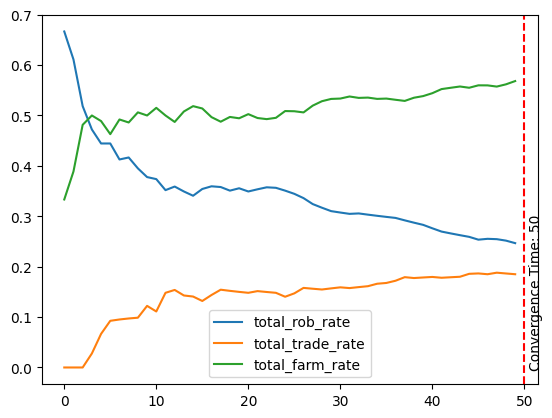

In [278]:
# draw a curve of total_rob_rate, total_trade_rate, total_farm_rate
from matplotlib import pyplot as plt

plot = analysis_df[['total_rob_rate', 'total_trade_rate', 'total_farm_rate']].plot()
plt.axvline(x=convergence_time, color='red', linestyle='--', label=f'Convergence Time')
plt.text(convergence_time+0.5, 0, f'Convergence Time: {convergence_time}', rotation=90)
#save it to file
fig = plot.get_figure()
fig.savefig('total_action_rate.png')

In [279]:
#Experieent output, only one row
experiemnt_df = pd.DataFrame()
#return ture if convergence time is less than 50
experiemnt_df['Convergence No More than 50 Rounds'] = [is_convergence_on_50_days]
experiemnt_df['Convergence Time'] = [convergence_time   ]
trade_count_before_obey = df[trade_count_columns].values[first_obey_day, range(len(first_obey_day))]
experiemnt_df['Number of Trade Before Convergence'] = [sum(trade_count_before_obey)]
total_trade_count = analysis_df.loc[analysis_df.shape[0]-1, 'total_trade_count']
experiemnt_df['Number of Trade After Convergence'] = [total_trade_count - sum(trade_count_before_obey)]
trade_accept_before_obey = df[trade_accepted_columns].values[first_obey_day, range(len(first_obey_day))]
experiemnt_df['Number of Trade Accepted Before Convergence'] = [sum(trade_accept_before_obey)]
total_trade_accepted = analysis_df.loc[analysis_df.shape[0]-1, 'total_trade_accepted']
experiemnt_df['Number of Trade Accepted After Convergence'] = [total_trade_accepted - sum(trade_accept_before_obey)]
rob_count_before_obey = df[rob_count_columns].values[first_obey_day, range(len(first_obey_day))]
experiemnt_df['Number of Rob Before Convergence'] = [sum(rob_count_before_obey)]
total_rob_count = analysis_df.loc[analysis_df.shape[0]-1, 'total_rob_count']
experiemnt_df['Number of Rob After Convergence'] = [total_rob_count - sum(rob_count_before_obey)]
rob_rebelled_before_obey = df[rob_rebelled_columns].values[first_obey_day, range(len(first_obey_day))]
experiemnt_df['Number of Rob Rebelled Before Convergence'] = [sum(rob_rebelled_before_obey)]
total_rob_rebelled = analysis_df.loc[analysis_df.shape[0]-1, 'total_rob_rebelled']
experiemnt_df['Number of Rob Rebelled After Convergence'] = [total_rob_rebelled - sum(rob_rebelled_before_obey)]
farm_count_before_obey = df[farm_count_columns].values[first_obey_day, range(len(first_obey_day))]
experiemnt_df['Number of Farm Before Convergence'] = [sum(farm_count_before_obey)]
total_farm_count = analysis_df.loc[analysis_df.shape[0]-1, 'total_farm_count']
experiemnt_df['Number of Farm After Convergence'] = [total_farm_count - sum(farm_count_before_obey)]

total_activities_before_obey = experiemnt_df['Number of Trade Before Convergence'] + experiemnt_df['Number of Rob Before Convergence'] + experiemnt_df['Number of Farm Before Convergence']
total_activities_after_obey = experiemnt_df['Number of Trade After Convergence'] + experiemnt_df['Number of Rob After Convergence'] + experiemnt_df['Number of Farm After Convergence']
experiemnt_df['Ratio of Trade Before Convergence'] = experiemnt_df['Number of Trade Before Convergence'] / total_activities_before_obey
experiemnt_df['Ratio of Trade After Convergence'] = experiemnt_df['Number of Trade After Convergence'] / total_activities_after_obey
experiemnt_df['Ratio of Trade Accepted Before Convergence'] = experiemnt_df['Number of Trade Accepted Before Convergence'] / total_activities_before_obey
experiemnt_df['Ratio of Trade Accepted After Convergence'] = experiemnt_df['Number of Trade Accepted After Convergence'] / total_activities_after_obey
experiemnt_df['Ratio of Rob Before Convergence'] = experiemnt_df['Number of Rob Before Convergence'] / total_activities_before_obey
experiemnt_df['Ratio of Rob After Convergence'] = experiemnt_df['Number of Rob After Convergence'] / total_activities_after_obey
experiemnt_df['Ratio of Rob Rebelled Before Convergence'] = experiemnt_df['Number of Rob Rebelled Before Convergence'] / total_activities_before_obey
experiemnt_df['Ratio of Rob Rebelled After Convergence'] = experiemnt_df['Number of Rob Rebelled After Convergence'] / total_activities_after_obey
experiemnt_df['Ratio of Farm Before Convergence'] = experiemnt_df['Number of Farm Before Convergence'] / total_activities_before_obey
experiemnt_df['Ratio of Farm After Convergence'] = experiemnt_df['Number of Farm After Convergence'] / total_activities_after_obey
experiemnt_df


,Convergence No More than 50 Rounds,Convergence Time,Number of Trade Before Convergence,Number of Trade After Convergence,Number of Trade Accepted Before Convergence,Number of Trade Accepted After Convergence,Number of Rob Before Convergence,Number of Rob After Convergence,Number of Rob Rebelled Before Convergence,Number of Rob Rebelled After Convergence,Number of Farm Before Convergence,Number of Farm After Convergence,Ratio of Trade Before Convergence,Ratio of Trade After Convergence,Ratio of Trade Accepted Before Convergence,Ratio of Trade Accepted After Convergence,Ratio of Rob Before Convergence,Ratio of Rob After Convergence,Ratio of Rob Rebelled Before Convergence,Ratio of Rob Rebelled After Convergence,Ratio of Farm Before Convergence,Ratio of Farm After Convergence
0,False,50,35,49,15,14,99,13,85,11,90,168,0.15625,0.213043,0.066964,0.06087,0.441964,0.056522,0.379464,0.047826,0.401786,0.730435
